In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# "Toxic Comment Classification Challenge"


# 1. Exploratory Data Analysis

In [2]:
train_dataset=pd.read_csv('train.csv')

In [3]:
train_dataset.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [4]:
train_dataset.describe()

toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [5]:
train_dataset.info()
#No null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


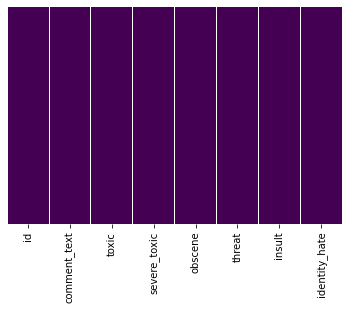

In [6]:
sns.heatmap(train_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
print("There are {} messages.".format(len(train_dataset)))

There are 159571 messages.


In [8]:
test_dataset = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [9]:
submission

id  toxic  severe_toxic  obscene  threat  insult  \
0       00001cee341fdb12    0.5           0.5      0.5     0.5     0.5   
1       0000247867823ef7    0.5           0.5      0.5     0.5     0.5   
2       00013b17ad220c46    0.5           0.5      0.5     0.5     0.5   
3       00017563c3f7919a    0.5           0.5      0.5     0.5     0.5   
4       00017695ad8997eb    0.5           0.5      0.5     0.5     0.5   
...                  ...    ...           ...      ...     ...     ...   
153159  fffcd0960ee309b5    0.5           0.5      0.5     0.5     0.5   
153160  fffd7a9a6eb32c16    0.5           0.5      0.5     0.5     0.5   
153161  fffda9e8d6fafa9e    0.5           0.5      0.5     0.5     0.5   
153162  fffe8f1340a79fc2    0.5           0.5      0.5     0.5     0.5   
153163  ffffce3fb183ee80    0.5           0.5      0.5     0.5     0.5   

        identity_hate  
0                 0.5  
1                 0.5  
2                 0.5  
3                 0.5  
4                 0.5  
...               ...  
153159            0.5  
153160            0.5  
153161            0.5  
153162            0.5  
153163            0.5  

[153164 rows x 7 columns]

In [10]:
submission.describe()

toxic  severe_toxic   obscene    threat    insult  identity_hate
count  153164.0      153164.0  153164.0  153164.0  153164.0       153164.0
mean        0.5           0.5       0.5       0.5       0.5            0.5
std         0.0           0.0       0.0       0.0       0.0            0.0
min         0.5           0.5       0.5       0.5       0.5            0.5
25%         0.5           0.5       0.5       0.5       0.5            0.5
50%         0.5           0.5       0.5       0.5       0.5            0.5
75%         0.5           0.5       0.5       0.5       0.5            0.5
max         0.5           0.5       0.5       0.5       0.5            0.5

**Labels behavior**

In [11]:
labels=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
occurence=[]
print("\n{:^15} | {:^15} | {:^5}".format("Labels", "Occurrence", "%"))
print("*"*42)
for i in labels:
    print("{:15} | {:>15} | {:^5.2f}".format(i, 
                                             train_dataset[i].value_counts()[1], 
                                             train_dataset[i].value_counts()[1]*100/len(train_dataset)
                                            )
         )
    occurence.append(train_dataset[i].value_counts()[1])


    Labels      |   Occurrence    |   %  
******************************************
toxic           |           15294 | 9.58 
severe_toxic    |            1595 | 1.00 
obscene         |            8449 | 5.29 
threat          |             478 | 0.30 
insult          |            7877 | 4.94 
identity_hate   |            1405 | 0.88 


**Observation from above table**

* 9.58% of the messages are considered toxic and 1% are considered severe toxic. 

* But a message can belong to more than one class so let's take a look:

********

Text(0.5, 0, 'category')

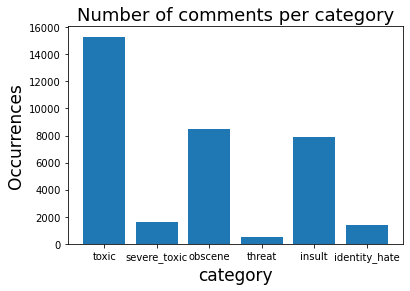

In [12]:
plt.figure(figsize=(6,4))
plt.bar(labels, occurence)
plt.title("Number of comments per category",fontsize=18)
plt.ylabel('Occurrences',fontsize=17)
plt.xlabel('category',fontsize=17)

In [13]:
comment=train_dataset['comment_text']
comment =comment.to_numpy()    

average length of comment : 394.07


<function matplotlib.pyplot.show(*args, **kw)>

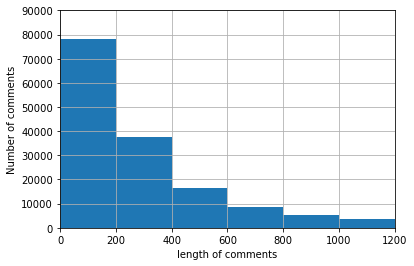

In [14]:
x=[len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment : {:.2f}'.format(sum(x)/len(x)))
bins=[1,200,400,600,800,1000,1200]
plt.hist(x,bins=bins)
plt.xlabel('length of comments')
plt.ylabel('Number of comments')
plt.axis([0,1200,0,90000])
plt.grid(True)
plt.show 

In [15]:
label = train_dataset[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())
label = label.to_numpy()

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


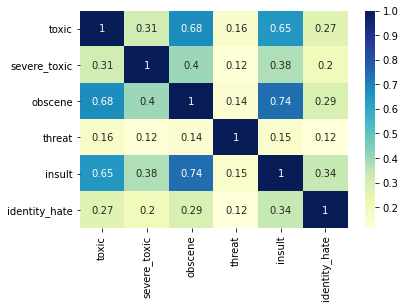

In [16]:
sns.heatmap(train_dataset.corr(),cmap='YlGnBu',annot=True)

In [17]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

def showWordCloud(df, label):
  plt.figure(figsize=(10,8))

  text = df[df[label]==1]["comment_text"].tolist()
  label_img = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=1200,
                          height=500,
                         ).generate(" ".join(text))

  plt.title(label,fontsize=40)
  plt.imshow(label_img)

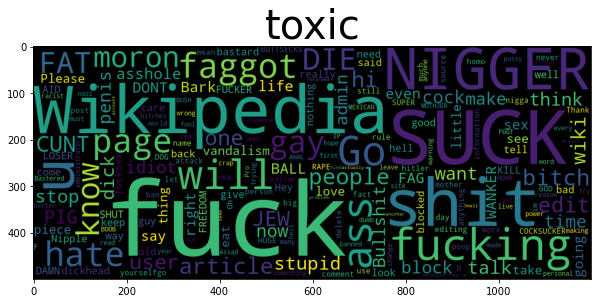

In [18]:
showWordCloud(train_dataset, "toxic")

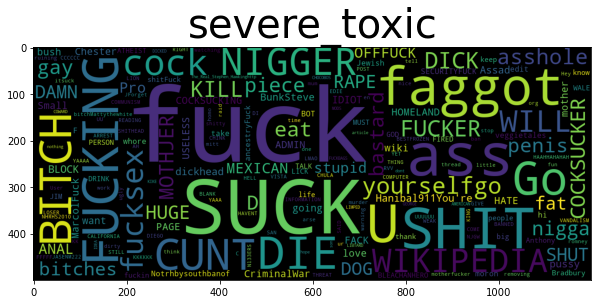

In [19]:
showWordCloud(train_dataset, "severe_toxic")

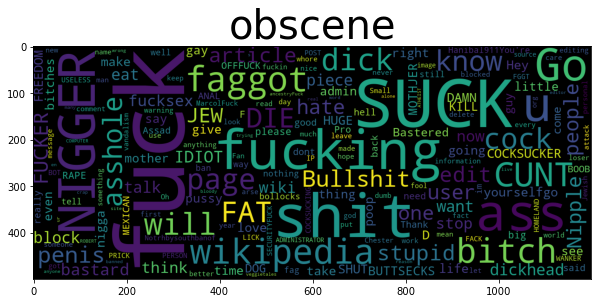

In [20]:
showWordCloud(train_dataset, "obscene")

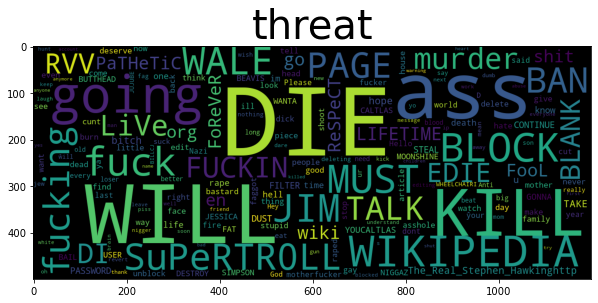

In [21]:
showWordCloud(train_dataset, "threat")

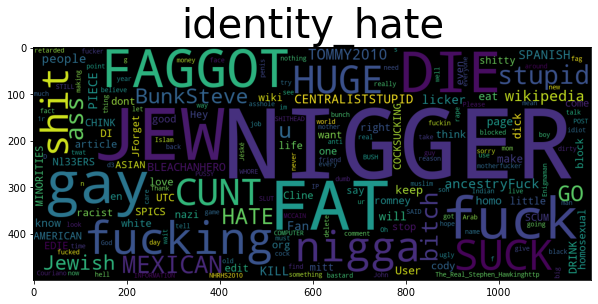

In [22]:
showWordCloud(train_dataset, "identity_hate")

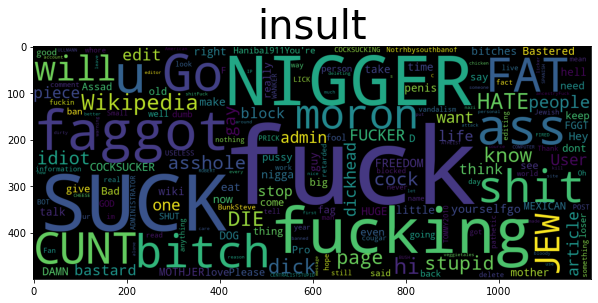

In [23]:
showWordCloud(train_dataset, "insult")


In [24]:
train_dataset['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [25]:
from IPython.display import display
pd.set_option('display.max_colwidth',-1) 

<ipython-input-25-1cac02388744>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


# 2.  Data Preprocessing


### Text Preprocessing
#### Cleaning data (Noise Removal)
* Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.

* For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, social media entities (mentions, hashtags), punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.

* A general approach for noise removal is to prepare a dictionary of noisy entities, and iterate the text object by tokens (or by words), eliminating those tokens which are present in the noise dictionary.

In [26]:
#Another method

#import nltk

#from nltk.corpus import stopwords
# Initialize the stopwords
#stop_words = stopwords.words('english')
#print(stop_words)

##Updating the list of stop words 
##Python has a built-in dictionary of stop words. I used the same and also appended the single letters
##like ‘b’, ‘c’ …. to it, which might be pre-existing or have generated during data preprocessing.

#stop_words.append('')

##The ord() function returns the number representing the unicode code of a specified character.
##The chr() is used for converting an Integer to a Character.

#for x in range(ord('b'), ord('z')+1):
#    stop_words.append(chr(x))
#print(stop_words)

In [27]:
punctuation='["\'?,\.=*_-]' # I will replace all these punctuation with ''
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    punctuation:'',
    '\s+':' ', # replace multi space with one single space
}

In [28]:
#Cleaning Dataset

def process_data(file):
    data=pd.read_csv(file)
    data.replace(abbr_dict,regex=True,inplace=True)
    display(data.head())
    return data

In [29]:
train=process_data('train.csv')

id  \
0  0000997932d777bf   
1  000103f0d9cfb60f   
2  000113f07ec002fd   
3  0001b41b1c6bb37e   
4  0001d958c54c6e35   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                comment_text  \
0  Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after I voted at New York Dolls FAC And please do not remove the template from the talk page since Im retired now892053827                                                                                                                                                                                                                                                                                                                                                          
1  Daww! He matches this background colour Im seemingly stuck with Thanks (talk) 21:51 January 11 2016 (UTC)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
2  Hey man Im really not trying to edit war Its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info                                                                                                                                                                                                                                                                                                                                                                                         
3   More I can not make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please let me know There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up Its listed in the relevant form eg Wikipedia:Goodarticlenominations#Transport    
4  You sir are my hero Any chance you remember what page that is on                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

   toxic  severe_toxic  obscene  threat  insult  identity_hate  
0  0      0             0        0       0       0              
1  0      0             0        0       0       0              
2  0      0             0        0

In [30]:
train_dataset['comment_text']

0         Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                         
1         D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)                                                                                                                                                                                                                                                 

In [31]:
train['comment_text']

0         Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after I voted at New York Dolls FAC And please do not remove the template from the talk page since Im retired now892053827                                                                                                                                                                                                                                                                                                                                                       
1         Daww! He matches this background colour Im seemingly stuck with Thanks (talk) 21:51 January 11 2016 (UTC)                                                                                                                                                                                                                                                                                 

In [32]:
import nltk

In [33]:
import string 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [34]:
train['comment_text'].str.replace('[{}]'.format(string.punctuation), '')

0         Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after I voted at New York Dolls FAC And please do not remove the template from the talk page since Im retired now892053827                                                                                                                                                                                                                                                                                                                                                     
1         Daww He matches this background colour Im seemingly stuck with Thanks talk 2151 January 11 2016 UTC                                                                                                                                                                                                                                                                                         

In [35]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0         Explanation Why edits made username Hardcore Metallica Fan reverted They vandalisms closure GAs I voted New York Dolls FAC And please remove template talk page since Im retired now892053827                                                                                                                                                                                                                  
1         Daww! He matches background colour Im seemingly stuck Thanks (talk) 21:51 January 11 2016 (UTC)                                                                                                                                                                                                                                                                                                                
2         Hey man Im really trying edit war Its guy constantly removing relevant information talking edits instead talk page He seems care formatting actual info                   

In [36]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation) + ["\'m"] + ["\'s"] + ["\'\'"] + ["``"] + ["n\'t"] + ["ca"]

In [37]:
from nltk.stem.wordnet import WordNetLemmatizer 

#### Lexicon Normalization

* Stemming- A large number of similar origin words are converted to the same word.
  E.g. words like “stems”, “stemmer”, “stemming”, “stemmed” are based on “stem”.

* Lemmatizing- Quite similar to stemming in its working but not exactly same. 
           - Lemmatising depends on correctly identifying the intended part of speech and meaning of a word in a sentence.
           - E.g. speaking-speak,spoke-spoke,was-to(be),better-good

In [38]:
lem = WordNetLemmatizer()
def clean_data(txt):
    txt = nltk.word_tokenize(txt.lower())
    txt = [word for word in txt if not word in useless_words]
    txt = [lem.lemmatize(w, "v") for w in txt]
    return ' '.join(word for word in txt)

In [39]:
train['comment_text'] = train['comment_text'].apply(lambda x:clean_data(x))

In [40]:
labels=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
occurence = []
for i in labels:
    print('The no of {} comments in file is {}'.format(i,train[i].sum()))
    occurence.append(train[i].value_counts()[1])

The no of toxic comments in file is 15294
The no of severe_toxic comments in file is 1595
The no of obscene comments in file is 8449
The no of threat comments in file is 478
The no of insult comments in file is 7877
The no of identity_hate comments in file is 1405


Text(0.5, 0, 'category')

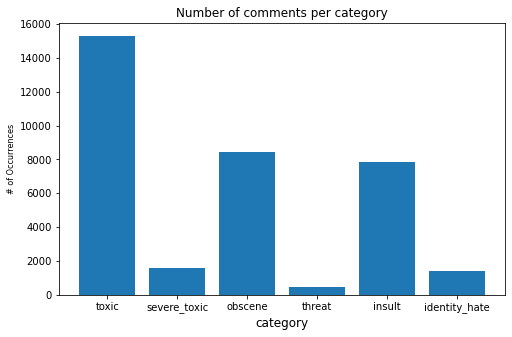

In [41]:
plt.figure(figsize=(8, 5))
plt.bar(labels, occurence)
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=8)
plt.xlabel('category', fontsize=12)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

import pickle

In [43]:
tfidf_vec = TfidfVectorizer(max_df=0.7,stop_words='english')

### Text to Features (Feature Engineering on text data)
* To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Syntactical Parsing, Entities / N-grams / word-based features, Statistical features, and word embeddings.

#### Term Frequency – Inverse Document Frequency (TF – IDF)
* TF-IDF is a weighted model commonly used for information retrieval problems. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering. For Example – let say there is a dataset of N text documents, In any document “D”, TF and IDF will be defined as –

* Term Frequency (TF) – TF for a term “t” is defined as the count of a term “t” in a document “D”

* Inverse Document Frequency (IDF) – IDF for a term is defined as logarithm of ratio of total documents available in the corpus and number of documents containing the term T.

* The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings,
and allow you to encode new documents.

* This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [44]:
data_train,data_test = train_test_split(train,test_size=0.2,random_state=42)

In [45]:
data_test['comment_text'] = data_test['comment_text'].apply(lambda x:clean_data(x))
data_train['comment_text'] = data_train['comment_text'].apply(lambda x:clean_data(x))

<ipython-input-45-caccf8b5c085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['comment_text'] = data_test['comment_text'].apply(lambda x:clean_data(x))
<ipython-input-45-caccf8b5c085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['comment_text'] = data_train['comment_text'].apply(lambda x:clean_data(x))


In [46]:
Logistic_pipeline = Pipeline([
                             ('tfidf', TfidfVectorizer()),
                             ('clf', OneVsRestClassifier(LogisticRegression(), n_jobs=1)),
                            ])

Logistic_pipeline.fit(data_train['comment_text'], data_train[labels])
prediction = Logistic_pipeline.predict(data_test['comment_text'])

print('Accuracy score is {}'.format(accuracy_score(data_test[labels],prediction)))
print(classification_report(data_test[labels],prediction))

C:\Users\Devaangini Mehta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score is 0.9174682751057497
              precision    recall  f1-score   support

           0       0.91      0.60      0.72      3056
           1       0.58      0.29      0.38       321
           2       0.92      0.62      0.74      1715
           3       0.65      0.15      0.24        74
           4       0.81      0.50      0.62      1614
           5       0.73      0.15      0.25       294

   micro avg       0.87      0.54      0.67      7074
   macro avg       0.77      0.38      0.49      7074
weighted avg       0.86      0.54      0.66      7074
 samples avg       0.05      0.05      0.05      7074



C:\Users\Devaangini Mehta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devaangini Mehta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
test_dataset['comment_text'] = test_dataset['comment_text'].apply(lambda x:clean_data(x))

In [48]:
test=Logistic_pipeline.predict_proba(test_dataset['comment_text'])
test

array([[0.99741347, 0.15741369, 0.99173442, 0.034526  , 0.93287277,
        0.19538813],
       [0.01099353, 0.00374569, 0.00790745, 0.00205737, 0.01038057,
        0.00431733],
       [0.04792144, 0.00513153, 0.01910129, 0.00188245, 0.0221858 ,
        0.00506897],
       ...,
       [0.00729958, 0.0027193 , 0.00679621, 0.00183433, 0.00645165,
        0.00300873],
       [0.0302788 , 0.00328534, 0.02254245, 0.00301202, 0.02469291,
        0.01392053],
       [0.89996053, 0.00288284, 0.47409889, 0.0026808 , 0.2023249 ,
        0.00738246]])

In [49]:
final=pd.DataFrame(test,index=test_dataset['id'],columns=[labels])
final

toxic severe_toxic   obscene    threat    insult  \
id                                                                      
00001cee341fdb12  0.997413  0.157414     0.991734  0.034526  0.932873   
0000247867823ef7  0.010994  0.003746     0.007907  0.002057  0.010381   
00013b17ad220c46  0.047921  0.005132     0.019101  0.001882  0.022186   
00017563c3f7919a  0.003194  0.001914     0.002449  0.001055  0.002488   
00017695ad8997eb  0.018560  0.002110     0.008261  0.001221  0.008580   
...                    ...       ...          ...       ...       ...   
fffcd0960ee309b5  0.552959  0.004798     0.144474  0.002471  0.054813   
fffd7a9a6eb32c16  0.076566  0.006423     0.027478  0.004976  0.040176   
fffda9e8d6fafa9e  0.007300  0.002719     0.006796  0.001834  0.006452   
fffe8f1340a79fc2  0.030279  0.003285     0.022542  0.003012  0.024693   
ffffce3fb183ee80  0.899961  0.002883     0.474099  0.002681  0.202325   

                 identity_hate  
id                              
00001cee341fdb12  0.195388      
0000247867823ef7  0.004317      
00013b17ad220c46  0.005069      
00017563c3f7919a  0.000961      
00017695ad8997eb  0.002101      
...                    ...      
fffcd0960ee309b5  0.007681      
fffd7a9a6eb32c16  0.013595      
fffda9e8d6fafa9e  0.003009      
fffe8f1340a79fc2  0.013921      
ffffce3fb183ee80  0.007382      

[153164 rows x 6 columns]

In [50]:
final.to_csv(path_or_buf='submission.csv')

In [51]:
pickle.dump(Logistic_pipeline, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))